# Tutorial 3, Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd # for working with data in csv tables
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

#supress showing plots, instead load generated png files
matplotlib.use('Agg')
from IPython.display import Image as IMG
from IPython.display import display
from PIL import Image
import os

#Default generates plots in dark mode
plt.style.use('dark_background') 
nice_cyan = (0,0.8,0.6)
nice_blue = (0.3,0.4,1)
nice_purple = (1,0.1,1)
nice_red = (0.8,0,0.1)
nice_yellow = (1,0.7,0)
nice_orange = (1,0.5,0)
off_white = (1,0.9,1)

In [2]:
#Run this cell if you want the plots in light mode
plt.style.use('default')
nice_cyan = (0.1,1,0.9)
nice_blue = (0.3,0.8,1)
nice_purple = (1,0.3,1)
nice_red = (0.9,0,0.1)
nice_yellow = (1,0.8,0.2)
nice_orange = (1,0.6,0.1)
off_white = (1,0.9,1)

In [3]:
# this loads all images from a given directory and returns a collage of them

def create_collage(dir, rows, cols, shrink, folder):
    image_files = [f for f in os.listdir(dir) if os.path.isfile(os.path.join(dir, f))]
    size_reference = Image.open(dir+image_files[0])
    c_width = size_reference.width * cols
    c_height = size_reference.height * rows
    collage = Image.new('RGB', (c_width, c_height))
    x_offset = 0
    y_offset = 0

    for image_file in image_files:
        image_path = os.path.join(dir, image_file)
        img = Image.open(image_path)
        img.thumbnail((c_width, c_height))
        collage.paste(img, (x_offset, y_offset))
    
        x_offset += img.width
        if x_offset >= c_width:
            x_offset = 0
            y_offset += img.height

    if (shrink > 1):
        new_width = int(c_width / shrink)  
        aspect_ratio = c_width / c_height
        new_height = int(new_width / aspect_ratio)
        collage = collage.resize((new_width, new_height), Image.ANTIALIAS)
    
    collage.save(folder)
    
    return collage

In [4]:
def plot_function(X,Y, title, folder):
    plt.figure(figsize=(8, 6))

    plt.plot(X,Y, color = nice_cyan, linewidth = 5,zorder=1)
    plt.plot(X,Y, color = nice_blue, linewidth = 2,zorder=1)

    plt.xlim(-10,10)
    plt.ylim(-10,10)
    plt.rc('text', usetex=True)
    plt.xlabel("$x$", fontsize = 18, rotation = 0)
    plt.ylabel("$y$", fontsize = 18, rotation = 0)
    plt.xticks([-10,-5,0,5,10], fontsize = 14)
    plt.yticks([-10,-5,0,5,10], fontsize = 14)
    plt.title(title, fontsize = 20)
    plt.grid(color=(0.2,0.2,0.2), linestyle='--', linewidth=0.7, zorder = 1)
    plt.savefig(folder)

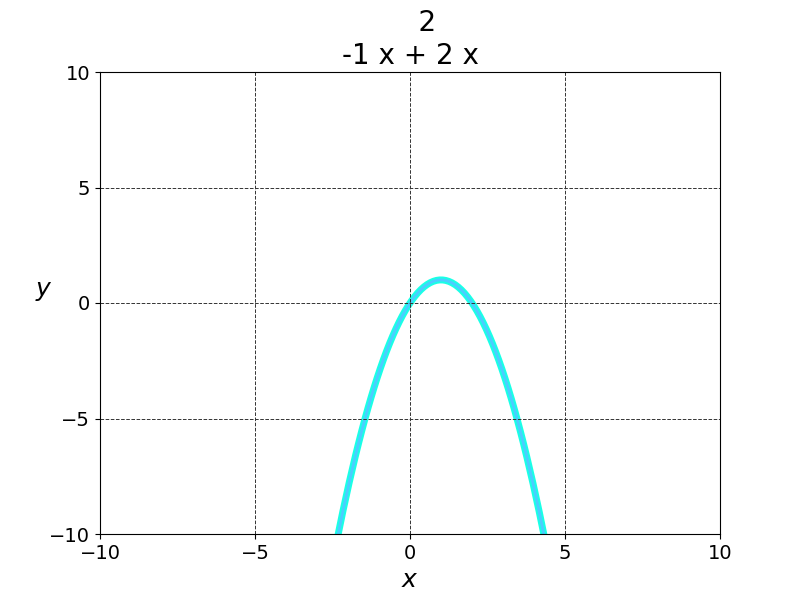

In [5]:
# Set poly
X = np.linspace(-10,10,200)

# w_1 * x^n + w_2 * x^{n-1} + ...  + w_n x^1 + w_{n+1} * x^0
#w = [1,0] # x
#w = [1,0,0] # x^2
w = [-1,2,0] 
poly_func = np.poly1d(w) 
Y = poly_func(X)

fname = "example_polynomial.png"
plot_function(X,Y,f"{poly_func}",fname)
display(IMG(fname))

In [6]:
def plot_function_and_datapoints(X,Y, X_measured, Y_measured,title,folder):
    plt.figure(figsize=(8, 6))

    plt.plot(X,Y, color = nice_cyan, linewidth = 5,zorder=1)
    plt.plot(X,Y, color = nice_blue, linewidth = 2,zorder=1, label=" Underlying function ")

    plt.scatter(X_measured,Y_measured, s = 60, color = nice_blue,  label="Measurement", zorder=2)
    fsize = 18
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    plt.rc('text', usetex=True)
    plt.xlabel("$x$", fontsize = 18, rotation = 0)
    plt.ylabel("$y$", fontsize = 18, rotation = 0)
    plt.xticks([-10,-5,0,5,10], fontsize = 14)
    plt.yticks([-10,-5,0,5,10], fontsize = 14)
    plt.legend(loc= "upper right", fontsize = fsize)
    plt.title(title, fontsize = 20)
    plt.grid(color=(0.2,0.2,0.2), linestyle='--', linewidth=0.7, zorder = 1)
    plt.savefig(folder)

In [7]:
def plot_pred_function_and_datapoints(X,Y, X_measured, Y_measured,title,folder):
    plt.figure(figsize=(8, 6))

    plt.plot(X,Y, color = nice_purple, linewidth = 5,zorder=1)
    plt.plot(X,Y, color = nice_red, linewidth = 2,zorder=1, label=" Predicted function ")

    plt.scatter(X_measured,Y_measured, s = 60, color = nice_blue,  label="Measurement", zorder=2)
    fsize = 18
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    plt.rc('text', usetex=True)
    plt.xlabel("$x$", fontsize = 18, rotation = 0)
    plt.ylabel("$y$", fontsize = 18, rotation = 0)
    plt.xticks([-10,-5,0,5,10], fontsize = 14)
    plt.yticks([-10,-5,0,5,10], fontsize = 14)
    plt.legend(loc= "upper right", fontsize = fsize)
    plt.title(title, fontsize = 20)
    plt.grid(color=(0.2,0.2,0.2), linestyle='--', linewidth=0.7, zorder = 1)
    plt.savefig(folder)

In [8]:
def plot_datapoints(X_measured, Y_measured,title,folder):
    plt.figure(figsize=(8, 6))

    plt.scatter(X_measured,Y_measured, s = 60, color = nice_blue,  label="Measurement", zorder=2)
    fsize = 18
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    plt.rc('text', usetex=True)
    plt.xlabel("$x$", fontsize = 18, rotation = 0)
    plt.ylabel("$y$", fontsize = 18, rotation = 0)
    plt.xticks([-10,-5,0,5,10], fontsize = 14)
    plt.yticks([-10,-5,0,5,10], fontsize = 14)
    plt.legend(loc= "upper right", fontsize = fsize)
    plt.title(title, fontsize = 20)
    plt.grid(color=(0.2,0.2,0.2), linestyle='--', linewidth=0.7, zorder = 1)
    plt.savefig(folder)

In [13]:
def plot_datapoints(X_measured, Y_measured,title,folder):
    plt.figure(figsize=(8, 6))

    plt.scatter(X_measured,Y_measured, s = 60, color = nice_blue,  label="Measurement", zorder=2)
    fsize = 18
    plt.xlim(0,10)
    plt.ylim(-5,20)
    plt.rc('text', usetex=True)
    plt.xlabel("$x$", fontsize = 18, rotation = 0)
    plt.ylabel("$y$", fontsize = 18, rotation = 0)
    plt.xticks([0,5,10], fontsize = 14)
    plt.yticks([-5,0,5,10], fontsize = 14)
    plt.legend(loc= "upper right", fontsize = fsize)
    plt.title(title, fontsize = 20)
    plt.grid(color=(0.2,0.2,0.2), linestyle='--', linewidth=0.7, zorder = 1)
    plt.savefig(folder)

In [14]:
X = np.array([0,1,2,3])
Y = np.array([16,8,4,2])
plot_datapoints(X,Y,"", "fish.png")

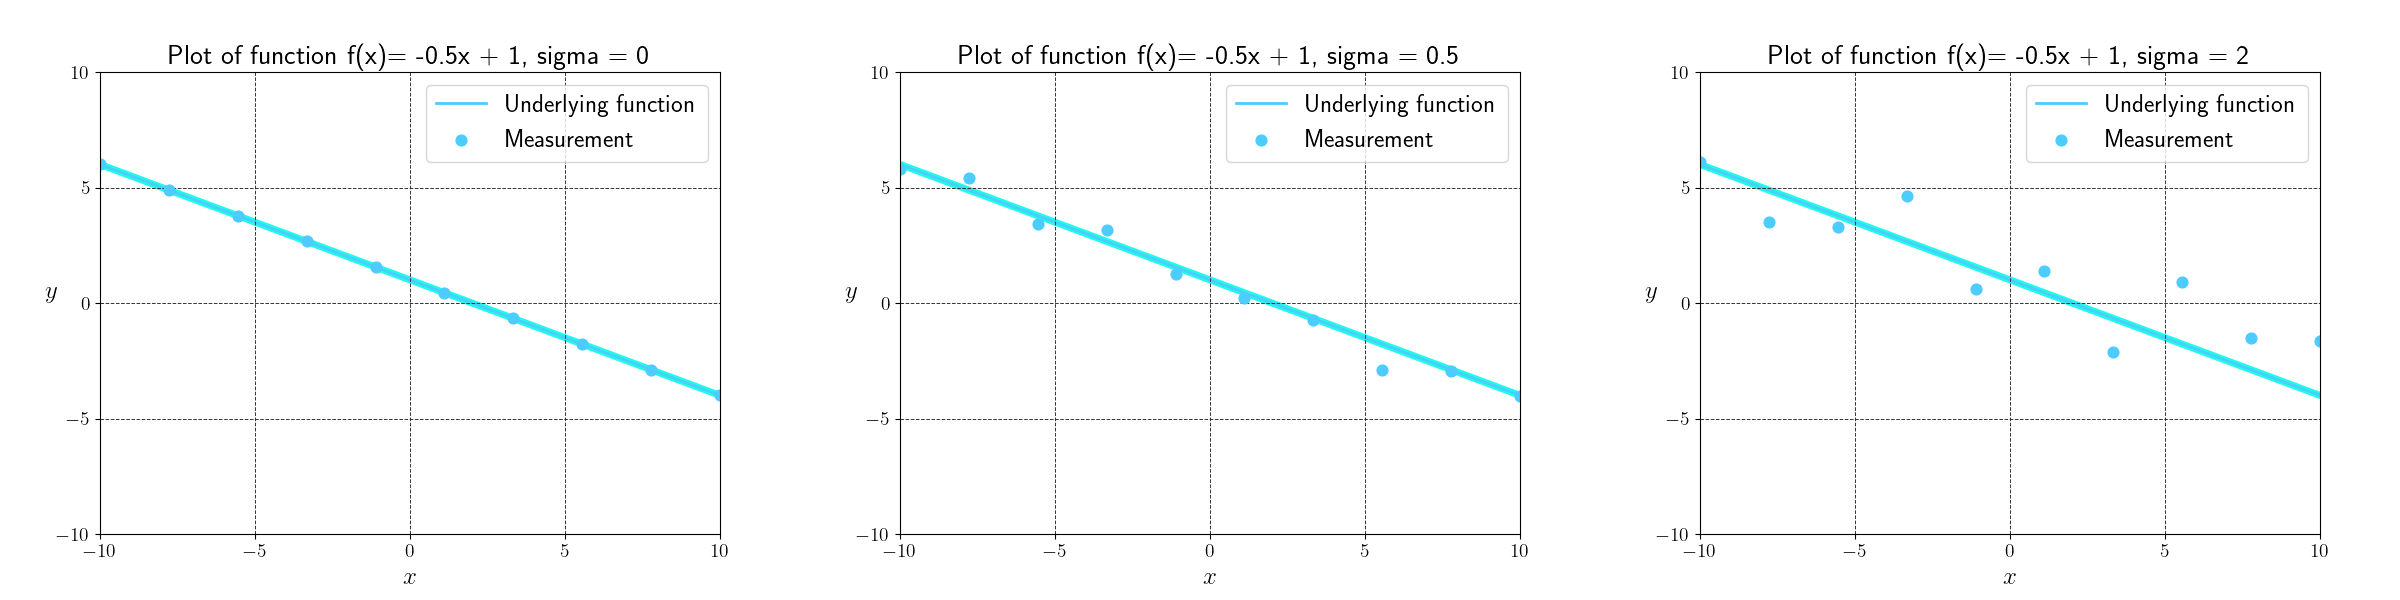

In [9]:
#generate and plot noise data
n = 10
X = np.linspace(-10, 10, n, dtype=float)
X_measured = np.linspace(-10, 10, n, dtype=float)

#change function here
Y = X * -0.5 + 1

noises = [0, 0.5, 2]
for i in range(0, 3):
    Y_measured = Y + np.random.normal(0, noises[i], n) 
    fname = f"noise/noise_{i}.png"
    plot_function_and_datapoints(X,Y,X_measured,Y_measured,f"Plot of function f(x)= -0.5x + 1,  sigma = {noises[i]}  ", fname)

create_collage("noise/", 1,3,1,"different_gaussian_noise_on_linear.png")

## Task 1

### this section only works if phi, ols and ols_rr are defined

In [10]:
# hide this cell 
def phi(x, p):
       #TODO
def ols(X_mapped, Y):
       #TODO
def ols_rr(X_mapped, Y, lam):
       #TODO


IndentationError: expected an indented block after function definition on line 2 (1886136564.py, line 4)

In [1]:
X = np.array([0,1,2])
Y = np.array([0,1,0])
ols(X,Y)

NameError: name 'np' is not defined

In [39]:
X = np.array([0,1,2])
X = phi(X, 1)
print(X)

Y = np.array([0,1,0])
ols(X,Y)

[[0]
 [1]
 [2]]


array([0.2])

C:\Users\hanna\AppData\Local\Temp\ipykernel_13328\368125440.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


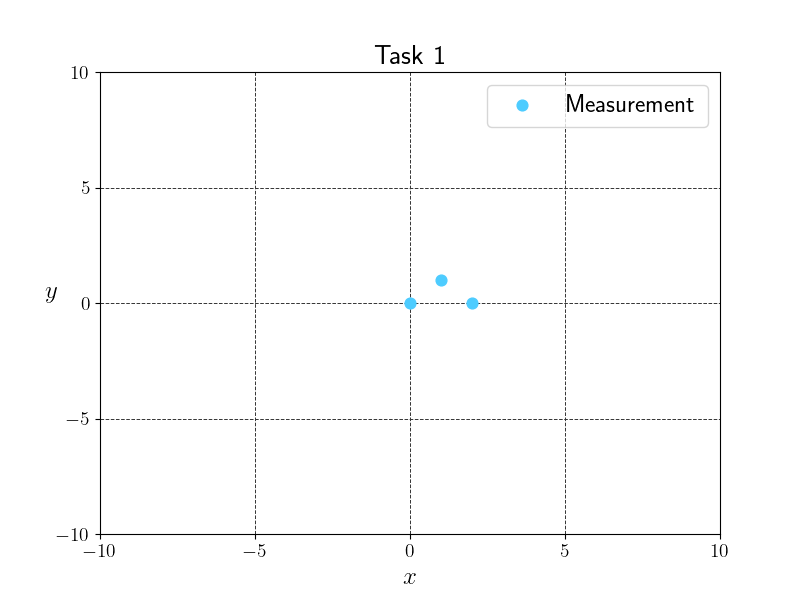

In [40]:
# task 1 setup
n = 100
X = np.linspace(-10, 10, n, dtype=float)

X_measured = np.array([0,1,2])
Y_measured = np.array([0,1,0])

fname = "task1.png"
plot_datapoints(X_measured, Y_measured, "Task 1", fname)
display(IMG(fname))

[-1.  2.  0.]


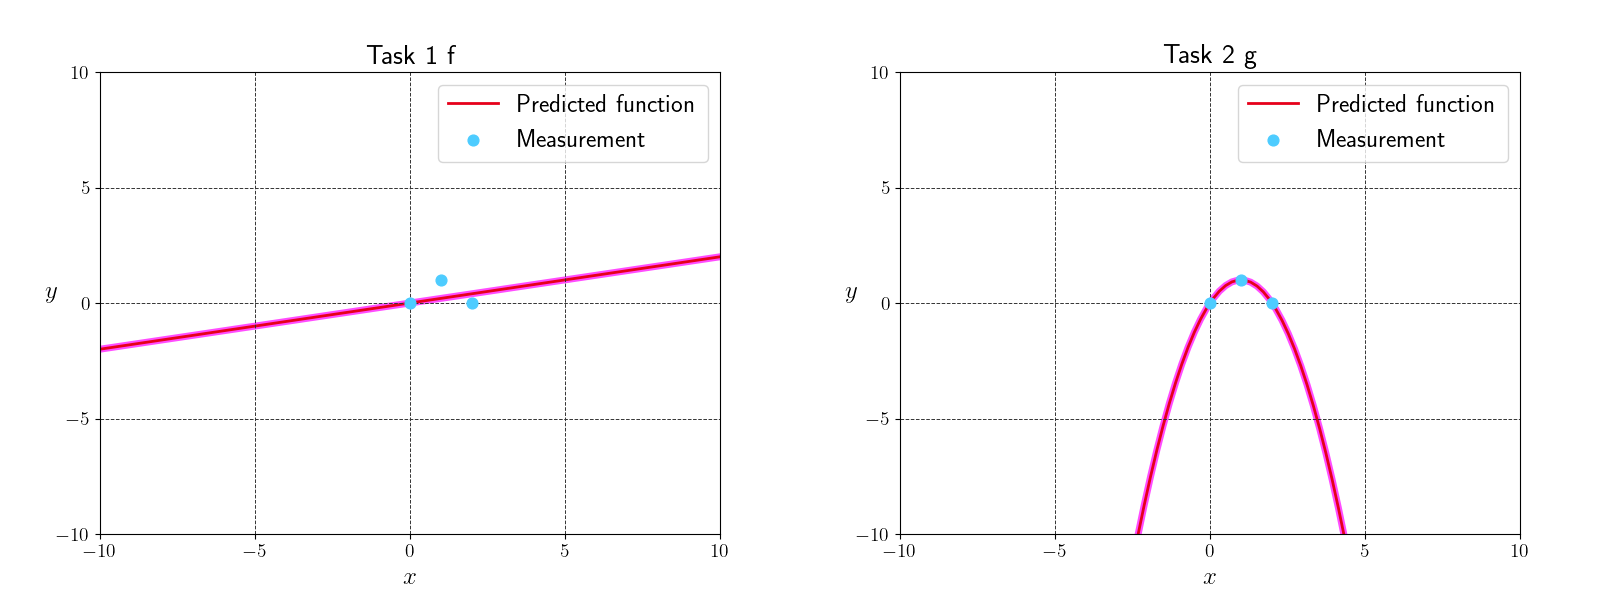

In [41]:
# calculate f
w = ols(X_measured,Y_measured) 
w = np.flip(w)
w = np.append(w, [0])
poly_func = np.poly1d(w) 
Y_prediction = poly_func(X)
plot_pred_function_and_datapoints(X,Y_prediction,X_measured,Y_measured,"Task 1 f","ha1/fit1.png")

# calculate g
w = ols(phi(X_measured, 2),Y_measured) 
w = np.flip(w)
w = np.append(w, [0]) # because we have no offset
print(w)
poly_func = np.poly1d(w) 
Y_prediction = poly_func(X)

plot_pred_function_and_datapoints(X,Y_prediction,X_measured,Y_measured,"Task 2 g","ha1/fit2.png")

create_collage("ha1/", 1, 2, 1,"ha3_1.png")

## (Extra) Example of usecase of simple linear regression

In [42]:
# Luminance transformation in different notebook

## Task 2

### instead of x being gaussian distributed, we look at x from linspace

In [43]:
def predict_multiple(n,noise_variance, datavariance_x, slope, n_predictions, title, folder):

    # Plot Data points from A and B
    plt.figure(figsize=(8, 6))

    X = np.linspace(-10, 10, 300, dtype=float)
    Y = slope * X

    plt.plot(X,Y, color = nice_cyan,alpha = 0.2, linewidth = 5,zorder=1, label="True function")
    plt.plot(X,Y, color = nice_blue, alpha = 0.2, linewidth = 2,zorder=1)

    for i in range(0,n_predictions):
        # to increase data variance along x-axis we stretch the X linspace before generating datapoints!
        X_measured = np.linspace(-10, 10, n, dtype=float) * datavariance_x

        # generating measurements 
        Y_measured = slope * X_measured + np.random.normal(0, noise_variance, n) 

        linregress_model = stats.linregress(X_measured, Y_measured)
        w = linregress_model[0] # slope
        beta = linregress_model[1] # offset
        
        # for drawing the predictions
        X = np.linspace(-10, 10, n, dtype=float) 
        Y_predicted = w * X + beta 

        plt.plot(X,Y_predicted, color = nice_purple, linewidth = 5,zorder=2)
        plt.plot(X,Y_predicted, color = nice_red, linewidth = 2,zorder=2)

    #plot one prediction twice for legend    
    plt.plot(X,Y_predicted, color = nice_purple, linewidth = 5,zorder=2)
    plt.plot(X,Y_predicted, color = nice_red, linewidth = 2,zorder=2, label = "predicted functions")

    #We plot only one set of generated datapoints
    plt.scatter(X_measured,Y_measured, s = 80, color = nice_blue,  label="Measurement", zorder=1)
    fsize = 18

    plt.xlim(-10,10)
    plt.ylim(-10,10)
    plt.rc('text', usetex=True)
    plt.xlabel("$x$", fontsize = 18, rotation = 0)
    plt.ylabel("$y$", fontsize = 18, rotation = 0)
    plt.xticks([-10,-5,0,5,10], fontsize = 14)
    plt.yticks([-10,-5,0,5,10], fontsize = 14)
    plt.legend(fontsize = fsize)
    plt.title(title, fontsize = 20)
    plt.grid(color=(0.2,0.2,0.2), linestyle='--', linewidth=0.7, zorder = 1)
    plt.savefig(folder)

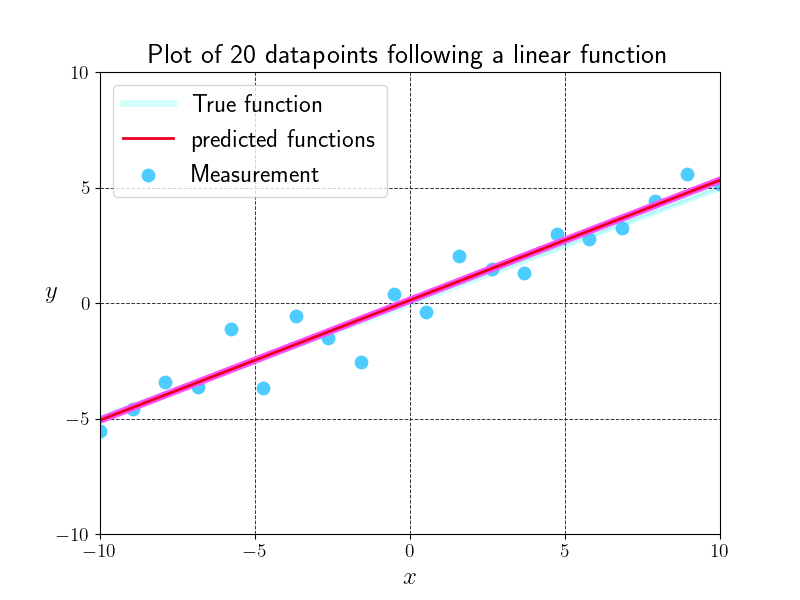

In [45]:
#setting
noise_variance = 1
x_variance_factor = 1 
n_predictions = 1
n_datapoints = 20
slope = 0.5

predict_multiple(n_datapoints,noise_variance,x_variance_factor,slope,n_predictions,f"Plot of {n_datapoints} datapoints following a linear function", "prediction_linear.png")
display(IMG(filename="prediction_linear.png"))

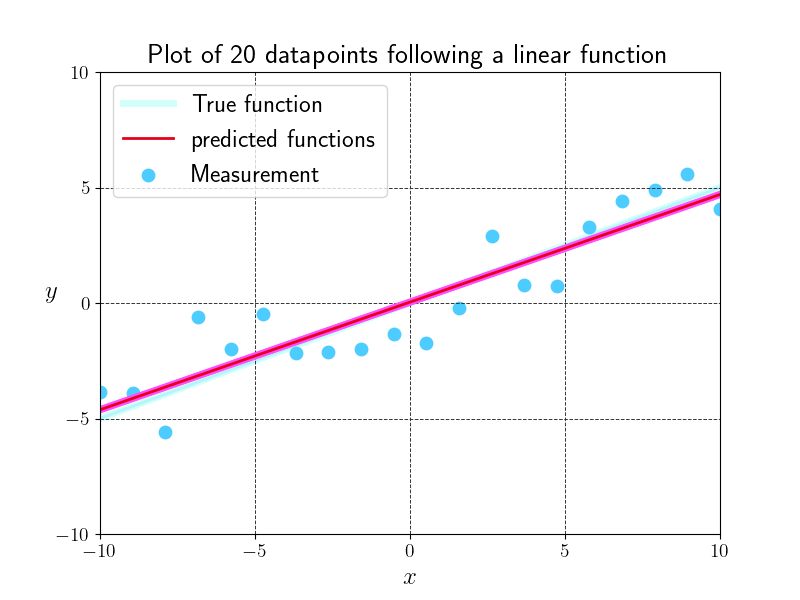

In [46]:
#setting
noise_variance = 1
x_variance_factor = 1 
n_predictions = 1
n_datapoints = 20
slope = 0.5

predict_multiple(n_datapoints,noise_variance,x_variance_factor,slope,n_predictions,f"Plot of {n_datapoints} datapoints following a linear function", "prediction_linear.png")
display(IMG(filename="prediction_linear.png"))

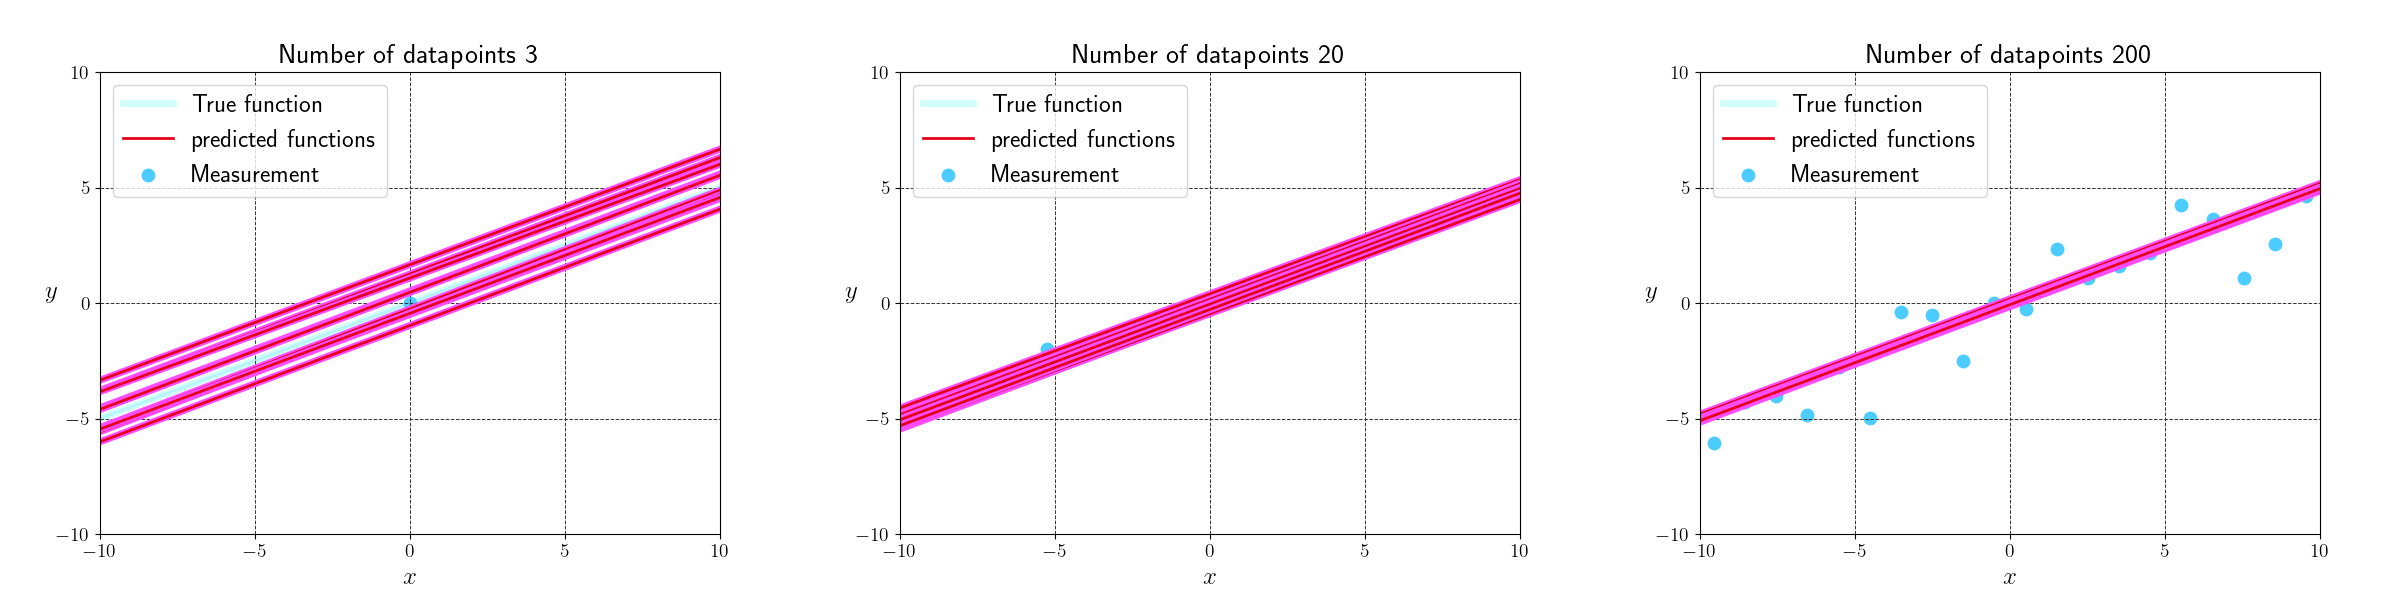

In [47]:
n_datapoints_list = [3,20,200]
noise_variance_factor = 1
x_variance_factor = 10 
n_predictions = 10
slope = 0.5

# different n data points
for i in range(0,len(n_datapoints_list)):
    predict_multiple(n_datapoints_list[i],noise_variance,x_variance_factor,slope,n_predictions,f"Number of datapoints {n_datapoints_list[i]}",f"ha2/ndata/prediction_linear{i}.png")

create_collage("ha2/ndata/", 1, len(n_datapoints_list), 1,"ha2_ndatapoints.png")


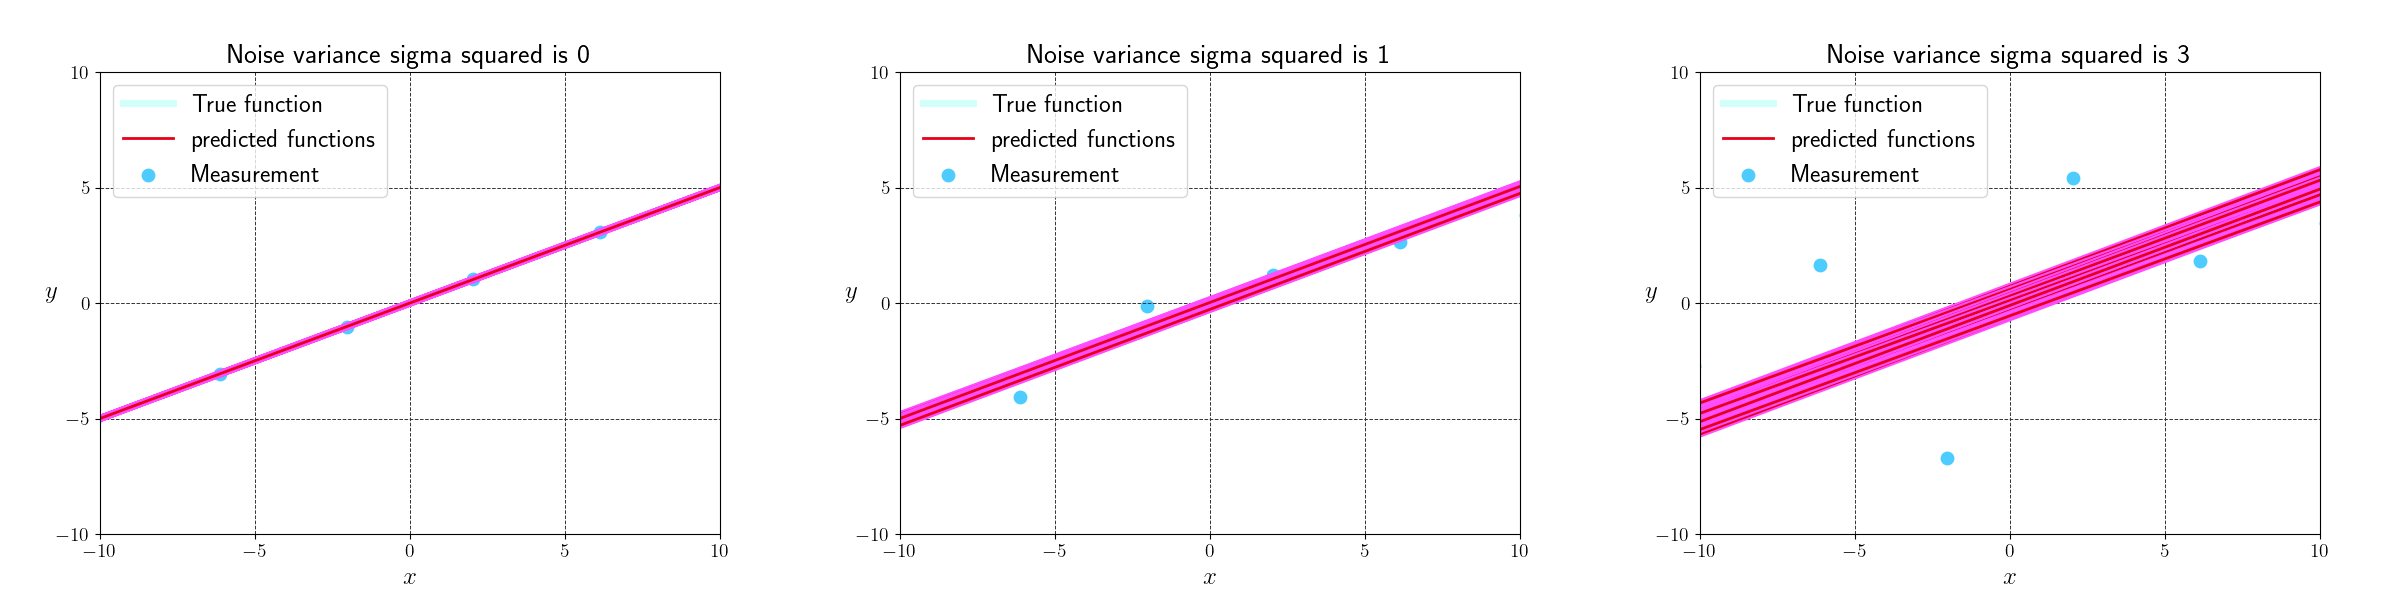

In [48]:
noise_variance_list = [0,1,3]
n_datapoints = 50

# different n data points
for i in range(0,len(n_datapoints_list)):
    predict_multiple(n_datapoints,noise_variance_list[i],x_variance_factor,slope,n_predictions,f"Noise variance sigma squared is {noise_variance_list[i]}",f"ha2/noisevar/prediction_linear_ndatapoints{i}.png")

create_collage("ha2/noisevar/", 1, len(n_datapoints_list), 1,"ha2_noisevariance.png")

In [49]:
# how do we in increase data variance in x-axis? Our sample range is larger.
#np.linspace(-10, 10, 10, dtype=float) * 1
#np.linspace(-10, 10, 10, dtype=float) * 2

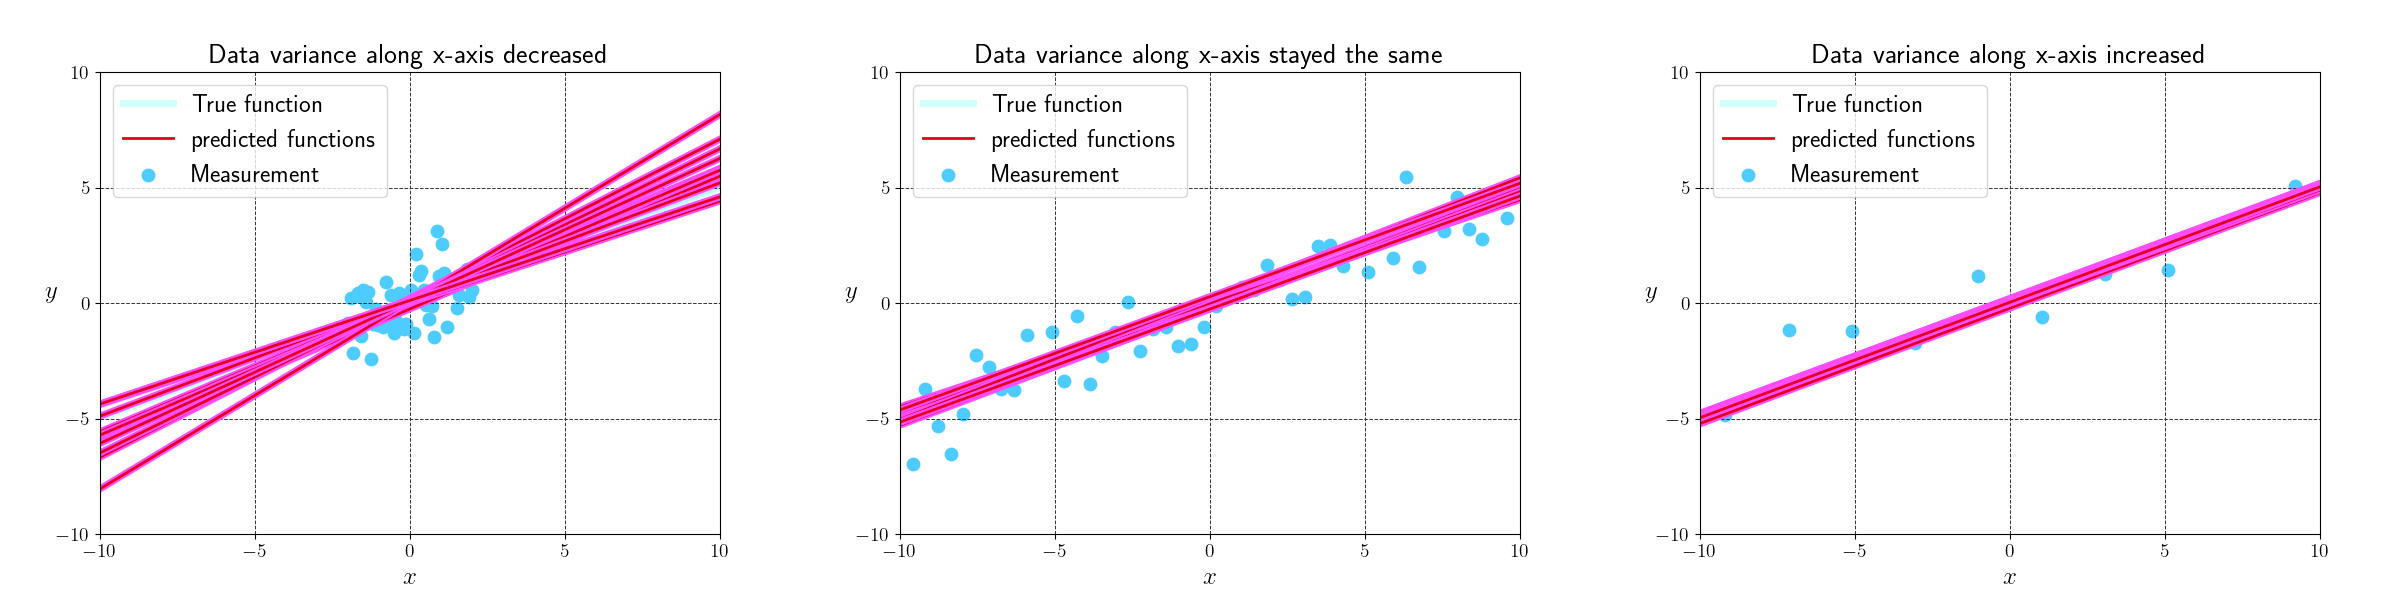

In [50]:
variance_x_list = [0.2,1,5] 
variance_x_list_names = ["decreased","stayed the same","increased"]

#noise_variance = 0
noise_variance = 1

# different x variance
for i in range(0,len(variance_x_list)):
    predict_multiple(n_datapoints,noise_variance,variance_x_list[i],slope,n_predictions,f"Data variance along x-axis {variance_x_list_names[i]}",f"ha2/xvar/prediction_sin_{i}.png")

create_collage("ha2/xvar/", 1, len(variance_x_list), 1,"ha2_xvar.png")

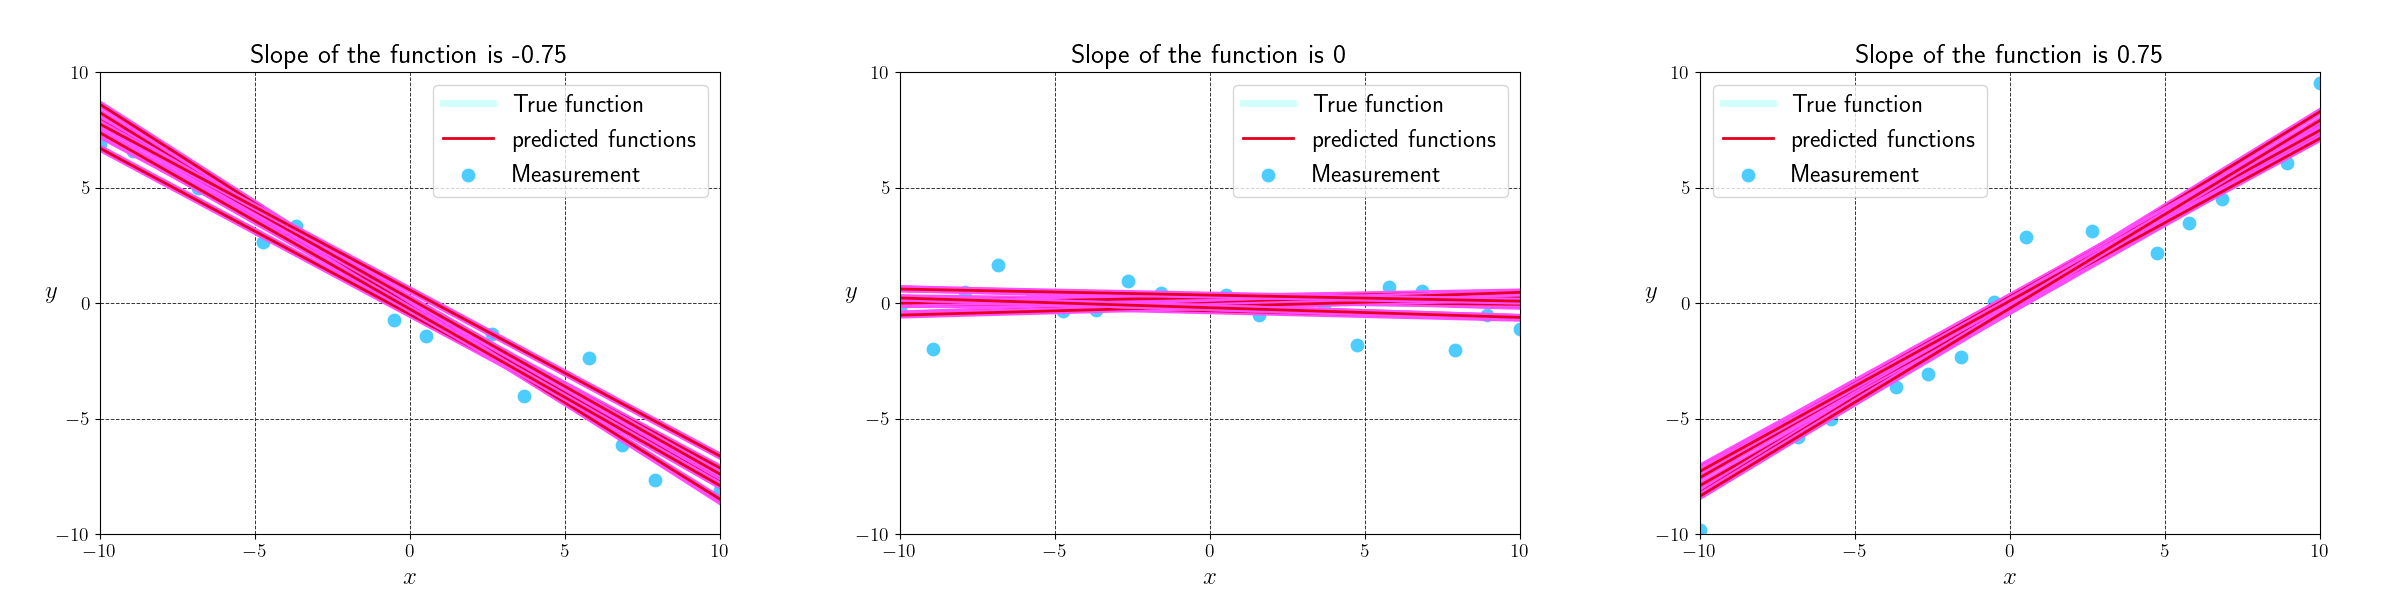

In [ ]:
slope_list = [-0.75,0, 0.75]
noise_variance = 1
n_datapoints = 20
x_variance_factor = 1
# different slope
for i in range(0,len(slope_list)):
    predict_multiple(n_datapoints,noise_variance,x_variance_factor,slope_list[i],n_predictions,f"Slope of the function is {slope_list[i]}",f"ha2/slope/prediction_sin_{i}.png")

create_collage("ha2/slope/", 1, len(slope_list), 1,"ha2_slope.png")

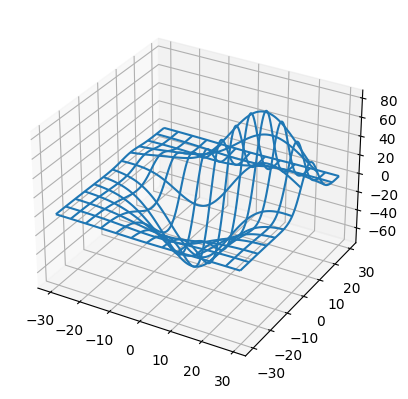

In [1]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()